In [0]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


# Raw Data

In [0]:
x = list(range(10))
points = np.random.randint(10, size=10)
points.sort()

Text(0.5, 0, 'time (x)')

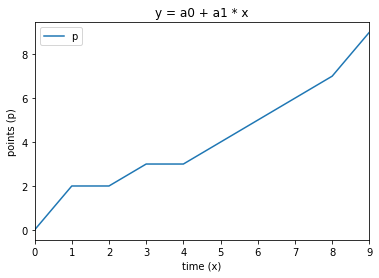

In [0]:
df = pd.DataFrame({'x': x, 'p': points})
ax = df.plot('x', 'p')
ax.set_title('y = a0 + a1 * x')
ax.set_ylabel('points (p)')
ax.set_xlabel('time (x)')

# Linear Model

In [0]:
model = smf.ols(formula = "p ~ x", data=df)
result = model.fit()
pred = result.predict(df)

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.16e-06
Time:                        20:33:11   Log-Likelihood:                -8.0572
No. Observations:                  10   AIC:                             20.11
Df Residuals:                       8   BIC:                             20.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2000      0.356      0.562      0.5

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


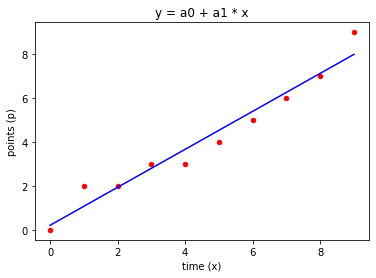

In [0]:
ax = df.plot.scatter('x', 'p', color='red')
ax.set_title('y = a0 + a1 * x')
ax.set_ylabel('points (p)')
ax.set_xlabel('time (x)')
ax.plot(df['x'], pred, color='blue')

# Quadratic Model

In [0]:
model2 = smf.ols(formula = "p ~ np.power(x, 2) + x", data=df)
result2 = model2.fit()
pred2 = result2.predict(df)

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           3.85e-06
Time:                        20:33:15   Log-Likelihood:                -5.7319
No. Observations:                  10   AIC:                             17.46
Df Residuals:                       7   BIC:                             18.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7455      0.403      1.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


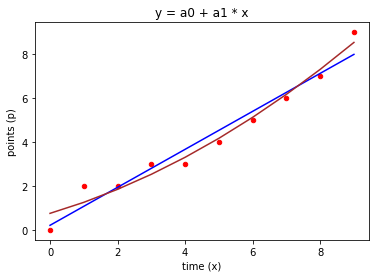

In [0]:
ax = df.plot.scatter('x', 'p', color='red')
ax.set_title('y = a0 + a1 * x')
ax.set_ylabel('points (p)')
ax.set_xlabel('time (x)')
ax.plot(df['x'], pred, color='blue')
ax.plot(df['x'], pred2, color='brown')


# Likelihood Ratio Test

In [0]:
# -- likelihood ratio test
lr, pval, ddof = result2.compare_lr_test(result)
print("p-value: {0} | {1}".format(round(pval, 3), pval))

p-value: 0.031 | 0.03104320056788268


p-value is 3.1%, means 96.9% confident to favor quadratic model

In [0]:
lr

4.650572053104096

In [0]:
ddof

1.0